### Importing python libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
import warnings
warnings.filterwarnings('ignore')

### Importing the data 

In [51]:
df = pd.read_csv(r'C:\Users\SUMANA\OneDrive\Desktop\Data Analytics Projects\Python Projects\Uber Data Analysis\uber-pickups-in-new-york-city-20221020T140811Z-001\uber-pickups-in-new-york-city\uber-raw-data-janjune-15.csv', encoding = 'utf-8')

In [52]:
df.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [53]:
df.shape

(14270479, 4)

### Data Cleaning

In [54]:
#checking duplicate values in df
df.duplicated().sum()

898225

In [55]:
#removing duplicate values from df
uber_df = df.drop_duplicates()

In [56]:
uber_df.shape

(13372254, 4)

In [57]:
#checking for null values
uber_df.isna().sum().sort_values(ascending=False).reset_index()

,index,0
0,Affiliated_base_num,160702
1,Dispatching_base_num,0
2,Pickup_date,0
3,locationID,0


We will deal with the null values in the affiliated_base_num column if we will use that column later

## Exploratory Data Analysis

### 1. Which month between January to June 2015 have the maximum uber pick-ups in New York city?

In [58]:
uber_df.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [59]:
#convert object type string to datetime for pickup_date column
uber_df['Pickup_date'] = pd.to_datetime(uber_df['Pickup_date'], format = '%Y-%m-%d %H:%M:%S')

In [60]:
uber_df['Pickup_date'].dtype

dtype('<M8[ns]')

In [61]:
uber_df['Pickup_month'] = uber_df['Pickup_date'].dt.month

In [62]:
#checking the new column
uber_df.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Pickup_month
0,B02617,2015-05-17 09:47:00,B02617,141,5
1,B02617,2015-05-17 09:47:00,B02617,65,5
2,B02617,2015-05-17 09:47:00,B02617,100,5
3,B02617,2015-05-17 09:47:00,B02774,80,5
4,B02617,2015-05-17 09:47:00,B02617,90,5


In [63]:
#counting number of rides per month
rides_month = uber_df['Pickup_month'].value_counts().reset_index().rename(columns={'index':'Month','Pickup_month':'Pickup_Count'})
rides_month = rides_month.sort_values(by = ['Month'])
dict_month = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun'}
rides_month['Month'] = rides_month['Month'].map(dict_month)
rides_month

,Month,Pickup_Count
5,Jan,1918970
2,Feb,2222189
4,Mar,2062639
3,Apr,2112705
1,May,2483980
0,Jun,2571771


Text(0.5, 1.0, 'Number of uber pickups per month')

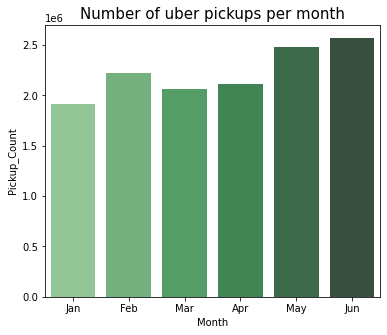

In [85]:
#plotting the graph
plt.figure(figsize=(6,5))
sns.barplot(x='Month',y='Pickup_Count',data = rides_month, palette = 'Greens_d')
plt.title("Number of uber pickups per month",fontsize=15)

### **Inference:** 
June has the highest uber pickup count between January to June 2015

### 2. Pickup count per day in a month in New York city?

In [65]:
#extracting weekday from the Pickup_date
uber_df['Week_Day'] = uber_df['Pickup_date'].dt.day_name()
uber_df['day'] = uber_df['Pickup_date'].dt.day

In [66]:
uber_df['hour'] = uber_df['Pickup_date'].dt.hour
uber_df['minute'] = uber_df['Pickup_date'].dt.minute

In [67]:
uber_df.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Pickup_month,Week_Day,day,hour,minute
0,B02617,2015-05-17 09:47:00,B02617,141,5,Sunday,17,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,5,Sunday,17,9,47
2,B02617,2015-05-17 09:47:00,B02617,100,5,Sunday,17,9,47
3,B02617,2015-05-17 09:47:00,B02774,80,5,Sunday,17,9,47
4,B02617,2015-05-17 09:47:00,B02617,90,5,Sunday,17,9,47


In [68]:
#uber pick up counts per weekday for all months
day_month = uber_df.groupby(['Pickup_month','Week_Day'], as_index=False).size()

In [69]:
day_month

,Pickup_month,Week_Day,size
0,1,Friday,339285
1,1,Monday,190606
2,1,Saturday,386049
3,1,Sunday,230487
4,1,Thursday,330319
5,1,Tuesday,196574
6,1,Wednesday,245650
7,2,Friday,373550
8,2,Monday,274948
9,2,Saturday,368311


In [70]:
day_month['Pickup_month'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [71]:
dict_month = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun'}

In [72]:
day_month['Pickup_month'] = day_month['Pickup_month'].map(dict_month)

In [73]:
day_month.head()

,Pickup_month,Week_Day,size
0,Jan,Friday,339285
1,Jan,Monday,190606
2,Jan,Saturday,386049
3,Jan,Sunday,230487
4,Jan,Thursday,330319


Text(0.5, 1.0, 'Number of uber pick ups per month and day')

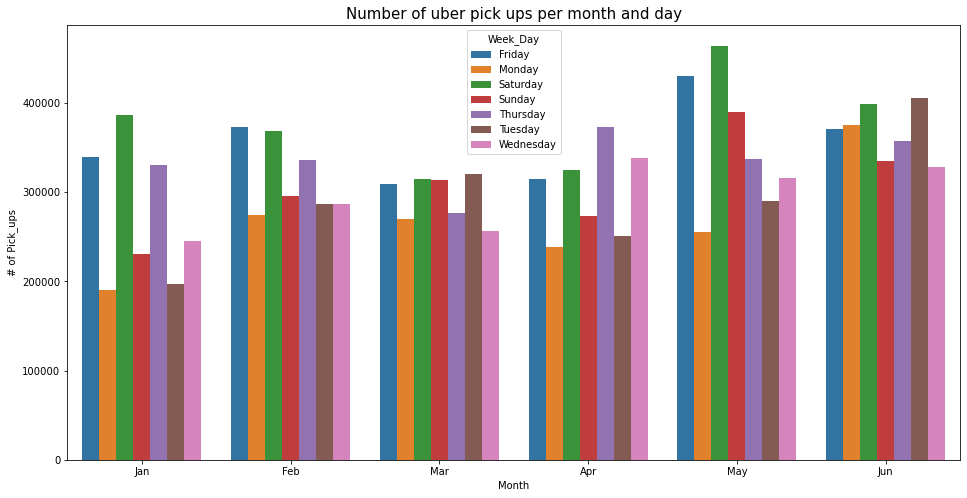

In [74]:
plt.figure(figsize=(16,8))
sns.barplot(x='Pickup_month',y='size',hue = 'Week_Day', data = day_month)
plt.xlabel('Month')
plt.ylabel('# of Pick_ups')
plt.title("Number of uber pick ups per month and day",fontsize=15)

### **Inference:**
    1. We can observe a varying trends in the booking across the different months.
    2. In January and May, Saturday shows the highest pickup, while Apr shows the highest on Thursday.
    3. In February, Friday and Saturday has high pickup numbers.
    4. In March, Tuesday, Friday, Saturday, and Sunday shows high numbers, and the pickup is almost 
       equally distributed among all seven days.
    4. June shows the highest pickup on Tuesday, followed by Saturday.

### 3. Hourly rush of uber bookings in New York city on all days

In [75]:
#hourly rush per day
hour_day = uber_df.groupby(['Week_Day','hour'], as_index=False).size()

In [76]:
hour_day.head(20)

,Week_Day,hour,size
0,Friday,0,79879
1,Friday,1,44563
2,Friday,2,27252
3,Friday,3,19076
4,Friday,4,23049
5,Friday,5,29563
6,Friday,6,46755
7,Friday,7,73565
8,Friday,8,95652
9,Friday,9,95711


Text(0.5, 1.0, 'Number of uber pick ups per hour and day')

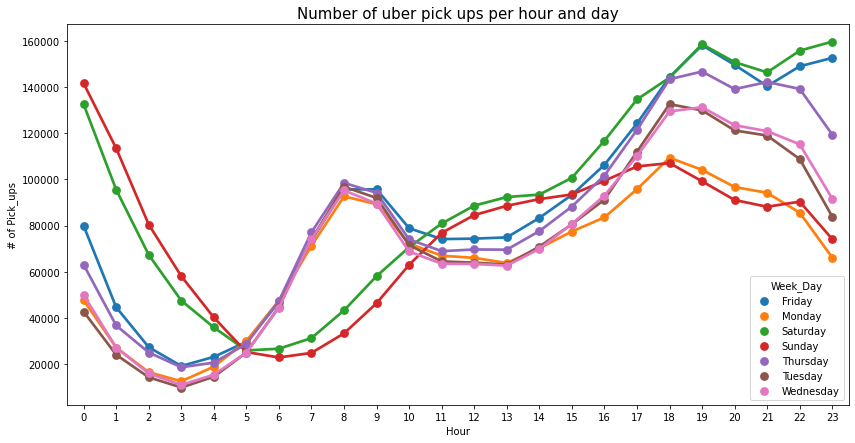

In [77]:
plt.figure(figsize=(14,7))
sns.pointplot(x='hour',y='size',hue = 'Week_Day', data = hour_day)
plt.xlabel('Hour')
plt.ylabel('# of Pick_ups')
plt.title("Number of uber pick ups per hour and day",fontsize=15)

In [78]:
#creating a pivot table using hour and day and visualizing through a heatmap
hour_day_pivot = uber_df.groupby(['Week_Day','hour']).size().unstack()

In [79]:
hour_day_pivot

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Week_Day,,,,,,,,,,,,,,,,,,,,,
Friday,79879,44563,27252,19076,23049,29563,46755,73565,95652,95711,...,83299,93297,106311,124264,144370,158189,149665,140473,149059,152707
Monday,47608,27093,16394,12461,18789,29964,47439,71280,92662,89232,...,70168,77414,83524,95763,109402,104129,96709,94189,85578,66097
Saturday,132555,95562,67298,47463,35829,25846,26584,31200,43223,58068,...,93414,100710,116781,134679,144150,158646,150845,146425,155830,159778
Sunday,141673,113495,80446,58043,40126,25137,22793,24778,33237,46323,...,91460,93479,99414,105638,107090,99181,91073,88141,90364,74100
Thursday,63000,36655,24940,18539,20546,28719,47341,77105,98496,94169,...,77575,88244,101691,121478,143467,146780,139163,142243,139247,119432
Tuesday,42659,23961,14191,9764,14433,24924,44684,74089,96836,91954,...,70858,80556,91241,112009,132634,129933,121253,119014,108826,83868
Wednesday,49928,27054,15866,10870,15286,24933,44382,74056,95232,89535,...,69876,80692,92997,110083,129492,131317,123490,120941,115208,91631


<AxesSubplot:xlabel='hour', ylabel='Week_Day'>

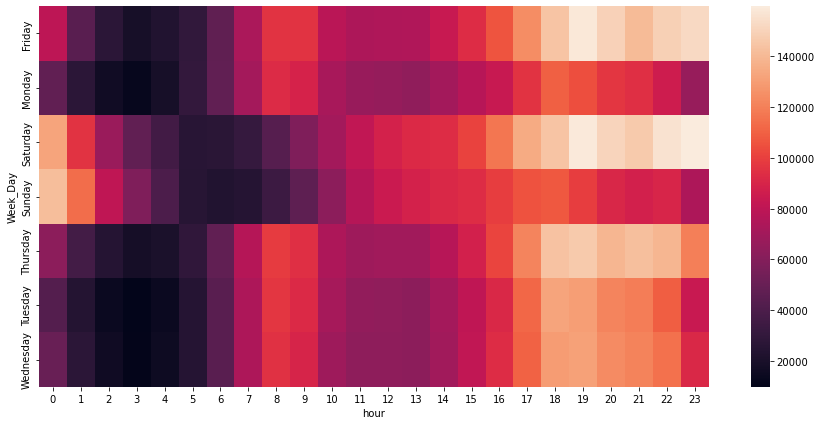

In [80]:
plt.figure(figsize=(15,7))
sns.heatmap(hour_day_pivot)

### **Inference:**
    1. Monday to Friday shows a rise in pickup around 7-9 am, probably because people go to work around that time.
       Except Friday, all weekdays shows a rise in the pickup again around 5(17) to 6(18) pm when people need to go home, 
       after which it gradually decreases.
    2. Friday and Saturday,followed by Thurday, shows a high pickup frequency in the evening.
    3. Sunday shows a low pickup compared to the other days in the evening and morning.
    4. Saturday and Sunday shows a high pickup at night, around 12 am to 2 am, maybe because people are out on Friday 
       and Saturday evenings and return home past midnight.

### 4. Which base number has the most number of active vehicles?

In [81]:
#we need to import data from a separate file for this analysis
uber_foil = pd.read_csv(r'C:\Users\SUMANA\OneDrive\Desktop\Data Analytics Projects\Python Projects\Uber Data Analysis\uber-pickups-in-new-york-city-20221020T140811Z-001\uber-pickups-in-new-york-city\Uber-Jan-Feb-FOIL.csv', encoding = 'utf-8')

In [82]:
uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [83]:
uber_foil.shape

(354, 4)

<AxesSubplot:xlabel='dispatching_base_number', ylabel='active_vehicles'>

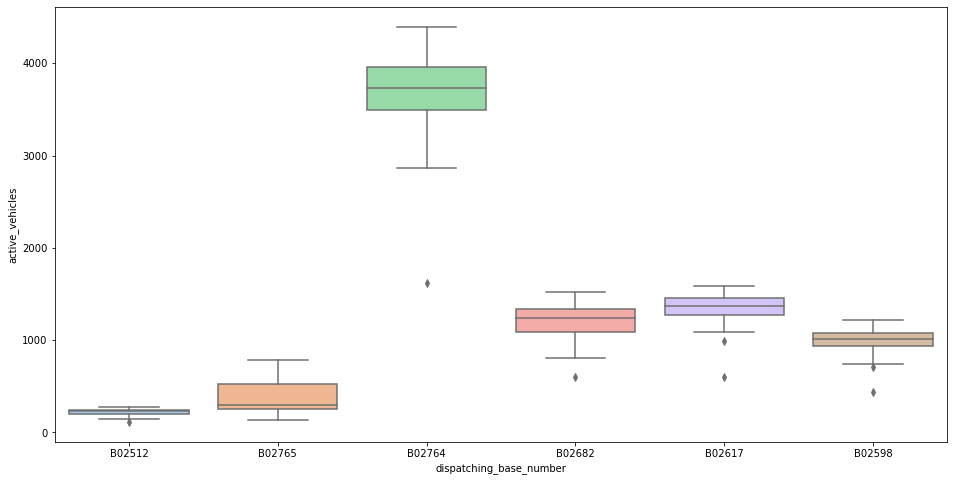

In [84]:
plt.figure(figsize=(16,8))
sns.boxplot(x = 'dispatching_base_number', y = 'active_vehicles', data = uber_foil, palette = 'pastel')

### **Inference**:
    Dispatch base number B02764 and B02512 shows the highest and lowest number of active vehicles, respectively.